<a href="https://colab.research.google.com/github/patriciaapenat/TFM/blob/main/Miranda_Pena_ExpltDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizaciones en Python, Explotación de datos

<p style="text-align: right;">Amaia Miranda</p>
<p style="text-align: right;">Patricia Peña</p>

Hemos decidido trabajar sobre nuestro TFM enfocado en Covid-19, concretamente trabajaremos los ficheros relativos a los ingresos en UCI y de test diagnóstico de Covid-19

#### Preparación del entorno de trabajo

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Clonación del Repositorio GitHub de **TFM**

---

In [2]:
! git clone https://github.com/patriciaapenat/TFM.git

Cloning into 'TFM'...
remote: Enumerating objects: 345, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 345 (delta 26), reused 1 (delta 1), pack-reused 307
Receiving objects: 100% (345/345), 17.55 MiB | 3.95 MiB/s, done.
Resolving deltas: 100% (189/189), done.
Updating files: 100% (33/33), done.


In [3]:
df_uci = pd.read_csv ('/content/TFM/Ficheros_Depurados/df_hosp_UCI_NEW.csv')

In [4]:
testing = pd.read_csv ('/content/TFM/Ficheros_Depurados/df_testing_covid_eu.csv')

## Data on hospital and ICU admission rates and current occupancy for COVID-19

In [5]:
df_uci

,PAIS_ISO3,PAIS_NOM,INDICADOR,FECHA,ANY_SEMANA,VALOR,FUENTE_ORIGEN
0,AUT,Austria,Daily hospital occupancy,01-04-2020,2020-14,856.000000,Country_Website
1,AUT,Austria,Daily hospital occupancy,02-04-2020,2020-14,823.000000,Country_Website
2,AUT,Austria,Daily hospital occupancy,03-04-2020,2020-14,829.000000,Country_Website
3,AUT,Austria,Daily hospital occupancy,04-04-2020,2020-14,826.000000,Country_Website
4,AUT,Austria,Daily hospital occupancy,05-04-2020,2020-14,712.000000,Country_Website
...,...,...,...,...,...,...,...
27628,SWE,Sweden,Weekly new ICU admissions per 100k,28-05-2023,2023-21,0.095672,TESSy COVID-19 combined sources
27629,SWE,Sweden,Weekly new ICU admissions per 100k,04-06-2023,2023-22,0.019134,TESSy COVID-19 combined sources
27630,SWE,Sweden,Weekly new ICU admissions per 100k,11-06-2023,2023-23,0.047836,TESSy COVID-19 combined sources
27631,SWE,Sweden,Weekly new ICU admissions per 100k,18-06-2023,2023-24,0.028702,TESSy COVID-19 combined sources


In [6]:
df_uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27633 entries, 0 to 27632
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PAIS_ISO3      27633 non-null  object 
 1   PAIS_NOM       27633 non-null  object 
 2   INDICADOR      27633 non-null  object 
 3   FECHA          27633 non-null  object 
 4   ANY_SEMANA     27633 non-null  object 
 5   VALOR          27633 non-null  float64
 6   FUENTE_ORIGEN  27633 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.5+ MB


### Plotly
Plotly es una biblioteca de visualización de datos interactiva que permite crear gráficos y visualizaciones de datos de alta calidad en diversos lenguajes de programación entre ellos Python

Gráfico de **barras** con la distribución de hospitalizaciones por paises. Para esto se agrupan los casos nuevos reportados a la fecha por pais y luego se procede a graficar.

In [7]:
# Ordenar el DataFrame de mayor a menor según el valor del indicador
df_sorted = df_uci.groupby('PAIS_ISO3')['VALOR'].sum().reset_index().sort_values(by='VALOR', ascending=False)

# Crear el gráfico de barras con Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_sorted['PAIS_ISO3'], y=df_sorted['VALOR'], marker_color='royalblue'))

# Añadir etiquetas y título al gráfico
fig.update_layout(
    xaxis_title='País',
    yaxis_title='Suma del Indicador',
    title='Representación por países del Indicador',
    xaxis_tickangle=-45
)

# Mostrar el gráfico
fig.show()

Gráfico de **líneas** con los casos reportados en España

In [10]:
# Filtrar los datos solo para España (Spain) y hacer una copia del DataFrame
df_spain = df_uci[df_uci['PAIS_NOM'] == 'Spain'].copy()

# Convertir la columna 'FECHA' al tipo datetime, especificando el formato de fecha 'DD-MM-YYYY'
df_spain['FECHA'] = pd.to_datetime(df_spain['FECHA'], format='%d-%m-%Y')

# Calcular la media por mes
df_spain_monthly = df_spain.resample('M', on='FECHA').mean(numeric_only=True)

# Eliminar los valores de media mensual que son cero o faltantes antes de la primera fecha con registros
first_valid_date = df_spain['FECHA'].min()
df_spain_monthly = df_spain_monthly.loc[df_spain_monthly.index >= first_valid_date]

# Resetear el índice para convertirlo en una columna y tener la columna 'FECHA' disponible para Plotly
df_spain_monthly.reset_index(inplace=True)

# Crear el gráfico de línea con las medias mensuales con Plotly
fig = px.line(df_spain_monthly, x='FECHA', y='VALOR',
              labels={'VALOR': 'Media Mensual', 'FECHA': 'Fecha'},
              title='Evolución media mensual de los casos en Spain')

# Ajustar las etiquetas del eje x para que muestren el mes y año en formato vertical
fig.update_xaxes(tickangle=90)

# Mostrar el gráfico
fig.show()

### Seaborn

La biblioteca Seaborn es una librería de visualización de datos basada en Python que se construye sobre Matplotlib y proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos y informativos. Seaborn está diseñada específicamente para trabajar con estructuras de datos de Pandas y es muy utilizada en el campo de la ciencia de datos, la estadística y la visualización de datos.

A continuación podemos ver boxplots en los que se grafican los países con más registros según el indicador que en este caso se refiere a los ingresos en UCI

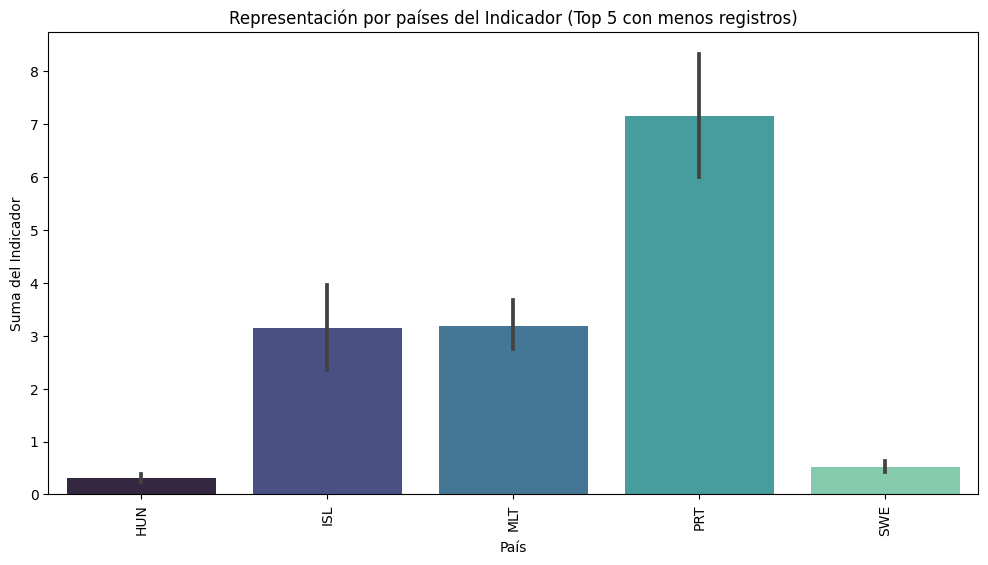

In [11]:
# Ordenar el DataFrame de mayor a menor según el valor del indicador
df_sorted = df_uci.groupby('PAIS_ISO3')['VALOR'].sum().reset_index().sort_values(by='VALOR', ascending=False)

# Obtener los cinco países con más registros
top_5_countries = df_sorted.head(5)

# Filtrar los datos para incluir solo los cinco países con más registros
df_filtered = df_uci[df_uci['PAIS_ISO3'].isin(top_5_countries['PAIS_ISO3'])]

# Crear el gráfico de barras con Seaborn y el palette Mako
plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x='PAIS_ISO3', y='VALOR', palette='mako')

# Añadir etiquetas y título al gráfico
plt.xlabel('País')
plt.ylabel('Suma del Indicador')
plt.title('Representación por países del Indicador (Top 5 con más registros)')

# Rotar las etiquetas del eje x para que estén en posición vertical
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

## Data on testing for COVID-19 by week and country.